#  Metropolis-Hastings Algorithm

Given a probability law $\pi$ and we try to simulate random variables under this law $ \pi $ which we will call the target law. The Metropolis-Hastings algorithm is one possible method to achieve this goal. The algorithm iteratively builds a sequence of random variables $ (X_n)_{n\geq 0} $ whose distribution converges to $ \pi $ when $ n \rightarrow +\infty $. Thus, when $ n $ is "large", a draw of $ X_n $ is almost equivalent to a draw along $ \pi $ and in practice, we approach $ \pi $ by the law of $ X_n $. For this reason, it is very important to quantify the approximation error. We will see that at least in some cases the error decreases exponentially in $ n $.

## Algorithm's hypotheses & description 
 To initialize the algorithm, we will use another probability law $ \mu$  (for example, we could take $\mu=\delta_{x_0}$ for $x_0\in E$).


Metropolis Hastings Algorithm requirs  two ingredients :

- A changing proposition $ Q: E \times E \ to [0,1] $ which is the
nucleus of a Markov chain such that
 $$ \forall x, y \in E ^ 2, \, Q (x, y)> 0 \iff Q (y, x)> 0. $$
 We assume that we know how to sample the measures $ Q (x, \cdot) $.
- An acceptance function $ a: E \times E \ to [0,1] $.

The algorithm then constructs a Markov chain $ (X_n) _ {n \ge 0} $ of
the following way: at the iteration $ n $, $ X_n $ being known,

- We propose a displacement towards $ Y_ {n + 1} $ according to the law $ Q (X_n, \cdot) $;
- We accept this displacement with probability
  $ a (X_n, Y_ {n + 1}) $, i.e. we derive $ U_ {n} $ from law
  uniform over $ (0,1) $ and

  - If $ U_ {n} \le a (X_n, Y_ {n + 1}) $, then $ X_ {n + 1} = Y_ {n + 1} $;
  - If $ U_ {n}> a (X_n, Y_ {n + 1}) $, then $ X_ {n + 1} = {X} _ {n} $.


The transition matrix $ P $ of the chain $ (X_n) _ {n \geq 0} $ is therefore given by

$$ P (x, y) = \begin {cases} a (x, y) Q (x, y), \quad \forall x, y \ in E, \quad \text {si $ x \neq y $ }
\\ 1- \sum_ {z \neq x} a (x, z) Q (x, z), \quad \text {if $ x = y $}. \end {cases} $$

We want the Markov chain $ (X_n) _ {n \geq 0} $ to be reversible with respect to
   $ \pi $, that is:
  
$$ \forall x, y, \qquad \pi (x) P (x, y) = \pi (y) P (y, x). $$

For this reason, we impose a certain structure on the acceptance function $ a $, which has the form

$$ \forall x, y \in E, \quad a (x, y) = \lambda (x, y) F (r (x, y)), $$


or

- $ F: \mathbb {R} _ + \ to [0,1] $ is a function such that

     $$ \forall z> 0, \quad F (z) = z \, F \left (\frac {1} {z} \right). $$


- $ \lambda: E \times E \to \mathbb {R} $ is a function such that $ \lambda (x, y) = \lambda (y, x) $ for all $ x \neq y $ verifying $ Q (x, y)> $ 0.



- $ r (x, y) $ is the Metropolis-Hastings ratio:
$$ r (x, y) = \frac {\pi (y) Q (y, x)} {\pi (x) Q (x, y)}. $$

Two classic choices are

- Barker's rule: $ \lambda = 1 $ and $ F (z) = \frac {z} {1 + z} $.
- The Metropolis-Hastings rule: $ \lambda = 1 $ and $ F (z) = \min (1, z) $. 

##  

In the following, we will study two different implementations of the algorithm for the same target law. The goal is to demonstrate the sensitivity of the speed of convergence to the choice of the acceptance rule $ a (.,.) $ And to the change proposition $ Q (.,.) $. More precisely, we will see that with a local version of the matrix $ Q $, the Markov chain risks getting stuck in the wells, which gives a bad speed of convergence. With a more global $ Q $ change proposal, we get much better results.

## Target distribution

Consider a target distribution $ \pi $ on the state space $ E = \{0, .., 2l \} $ with two wells:

$$ \forall x \in E, \quad \pi (x) = \frac {2 ^ {| x-l | }} {4 (2 ^ l-1) +1}. $$

The distance between the wells is determined by the parameter $ l $.

Note: if $ \pi (x)> 0 $ for any $ x $, we can write $ \pi (x) = e ^ {- V (x)} $ and $ V $ is called the potential, so that the neighborhood of a local maximum for $ \pi $ corresponds to the neighborhood of a local minimum, or "sink", for the potential $ V $. It is in this sense that the name "well" should be understood.

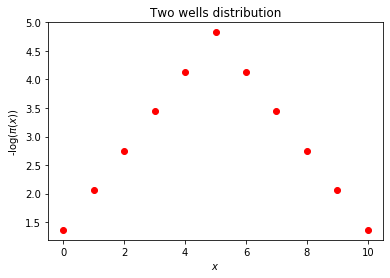

In [1]:
import numpy as np

import math

import matplotlib.pyplot as plt

import random



# wells length
l=5

# States space
L=2*l

# TwoWellLaw's Construction 
TwoWellLaw=np.ones(L+1) 

for i in range(L+1):
    TwoWellLaw[i]=2**(abs(i-l))/(4*(2**l-1)+1)

plt.figure(1)
plt.title('Two wells distribution')
plt.plot(np.array(range(L+1)), -np.log(TwoWellLaw),'ro')
plt.xlabel("$x$")
plt.ylabel("-log($\pi(x)$)")
plt.show()


## Local version 
Let us first consider a local change proposition given by

$$ \forall x, y \in E, \quad Q (x, y) = \frac {1} {2}, \quad \mbox {if $ | x-y | =  1 $ or $ x = y =  0$ , or $ x = y = 2l $. } $$

This matrix amounts to choosing a neighbor at random (except at the edges).


The Metropolis-Hastings ratio (calculated only for the couples $ (x, y) $ such that $ x \neq y $ and $ Q (x, y)> 0 $) is

 $$ r (x, y) = \begin {cases} 2 \quad \text {si $ | y-l | = | x-l | +1 $} \\1/2 \quad \text {if $ | y-l | = | x-l | -1 $}
\end {cases} $$

We use Barker's rule, i.e.


$$ \lambda \equiv 1, \quad F (z) = \frac {z} {1 + z} $$

The acceptance function is calculated explicitly

$$ a (x, y) = \begin {cases} 2/3 \quad \text {si $ | y-l | = | x-l | +1 $} \\1/3 \quad \text {if $ | y-l | = | x-l | -1 $} \end {cases} $$

and we deduce the transition matrix of the Metropolis-Hastings algorithm

$$ P (x, y) = \begin {cases} 1/3, \quad \mbox {if $ | y-l | = | x-l | + 1 $ and $ x \notin \{0,2l \} $} \\ 1/6, \quad \mbox {if $ | y-l | = | x-l | -1 $} \\ 1/2, \quad \mbox {if $ x = y $ and $ x \notin \{0, l , 2l \} $} \\ 1/3, \quad \mbox {if $ x = y = l $} \\ 5/6, \quad \mbox {if $ x = y $, and $ x \in \{0,2l \} $} \end {cases} $$

In the following, we will build the elementary functions allowing to define numerically the function of acceptance.


In [2]:

def neighbors(x):
    """
    input : an integer x
    output : list of neighbors of x 
    """
    if x ==0 :
        neigh= [x,x+1]
    
    elif x==L:
        neigh= [x-1,x]
    
    else:
        neigh=[x-1,x+1]
    
    return neigh


# Let's define the matrix Q

Q=np.zeros((L+1,L+1))

for x in range(L+1):
    for y in range(L+1):
        if y in neighbors(x):
            Q[x][y]=1/2

# Metropolis-Hastings ratio
def r(x,y,target):
    if abs(x-l)+1==abs(y-l):
        return 2
    else:
        return 1/2

#Acceptance rate with Barker's rule
def barkeracceptance(x,y,target):
    if abs(x-l)+1==abs(y-l):
        return 2/3
    else:
        return 1/3



The local proposition is chosen according to the uniform law on the set of neighbors.

In [3]:
# Local proposition :  uniform choice among neighbors
def localproposition(x):
    
    return random.choice(neighbors(x))

The initial state $ X_0 $ is drawn according to the uniform law. We choose the number of iterations of the algorithm.

In [4]:
X0=np.random.choice(list(range(L)),1)[0]

Niter=300 #Number of iterations

The following function implements the Metropolis-Hastings algorithm.

In [5]:
def MHlocal(X0,Niter,target):
    
    Xseq=[X0] # Xseq contains the sequance (X_n) of visited points by the algorithm
    
    for i in range(Niter):
        x=Xseq[-1]
        y=localproposition(x)
        U=np.random.random_sample(1)
        tau = barkeracceptance(x,y,target)
        if (U<=tau):
            Xseq.append(y)
        else:
            Xseq.append(x)
    
    return Xseq
         

By launching the algorithm, we observe that the trajectory of the Markov chain $ (X_n) $ remains mainly located around the wells $ 0 $ and $ 2 l $.

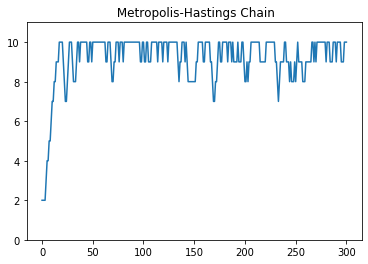

In [6]:
X=MHlocal(X0,Niter,TwoWellLaw)
plt.figure(2)
plt.ylim(0,L+1)  
plt.title(' Metropolis-Hastings Chain')
plt.plot(X)
plt.show()

## Local version: digital experiences


### Distance according to the starting point
We will now numerically study the speed of convergence of the algorithm using a Monte Carlo method. For that, we will build histograms to approach the law of $ X_{Niter} $ for different choices of the starting point $ X_0 $. We will then calculate the distance in total variation between the histogram and the target distribution $ \pi $.

In [7]:

def totvardist(p,q):
    """
    a function that calculate the distance in total variation between two measures p and q 
    """
    d= 0.5*sum(np.abs(p-q));
    return d




def MCtestloc(X0,Niter,Nsamples,target):
    """
    returns a sample of Nsamples of X_{Niter} using the local version
    """
    sample=[MHlocal(X0,Niter,TwoWellLaw)[-1] for i in range(Nsamples)]
    
    return sample


We will build a histogram for each starting point. We take $ N_ {iter} = 10 $.

<Figure size 432x288 with 0 Axes>

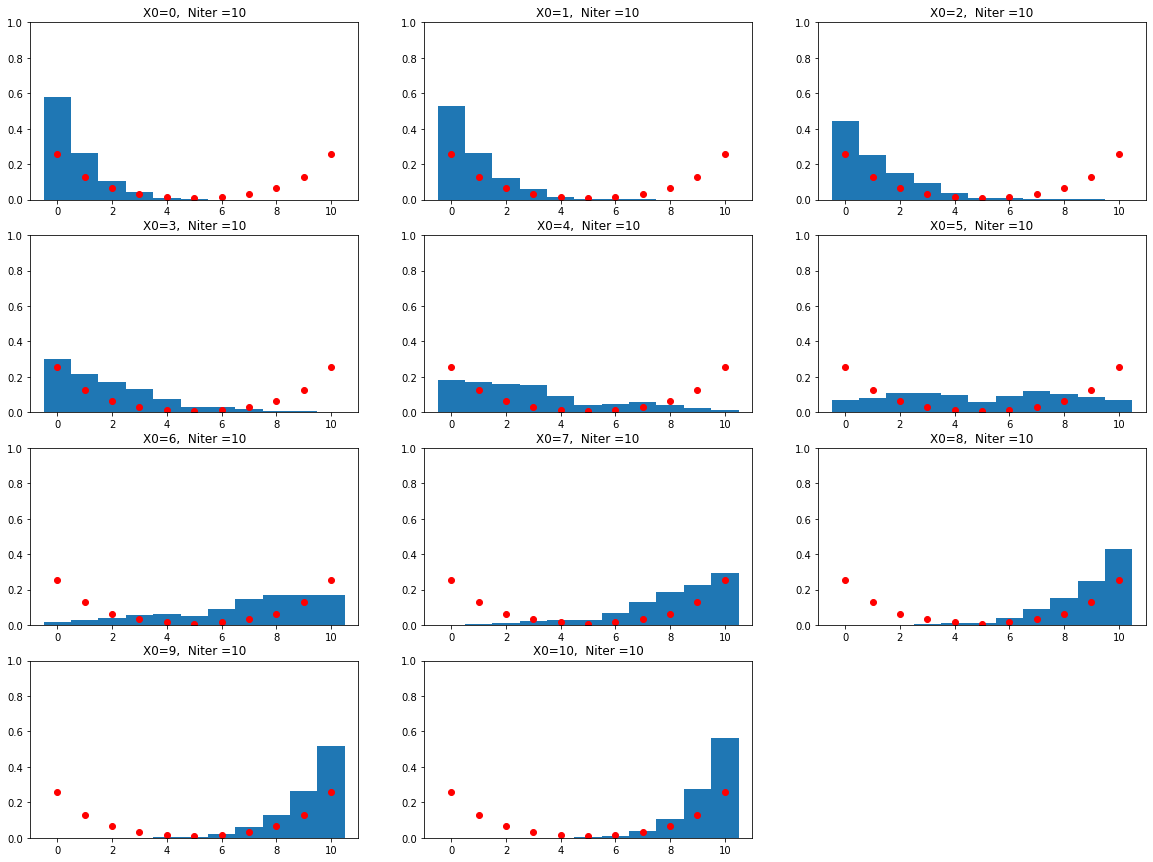

In [8]:
Nsamples=5000 # size of the used sample to construct the histogram
Niter=10

plt.figure(3)
plt.figure(figsize=(20,15))

 

spacing=(L+1)//11  
listofinitialpoints= spacing* list(range(12))
listofinitialpoints= [i for i in listofinitialpoints if i <=L]


for i in listofinitialpoints:
        X0= i
        echantillon=MCtestloc(X0,Niter,Nsamples,TwoWellLaw)
        plt.subplot(4,3, listofinitialpoints.index(i)+1)
        plt.hist(echantillon,L+1,range=(-0.5,L+1-0.5),density=True)
        plt.title("X0=" + str(i)+",  " "Niter ="+ str(Niter))
        plt.plot(TwoWellLaw,'ro')
        plt.axis([-1, L+1, 0, 1])

plt.show()





We observe that:

- Histograms strongly depend on the starting point;
- The histograms do not seem to describe the target law well, because they are mainly concentrated on one of the two wells.

We can study the distance in total variation as a function of the starting point, for a fixed number of iterations $ N_ {iter} $.

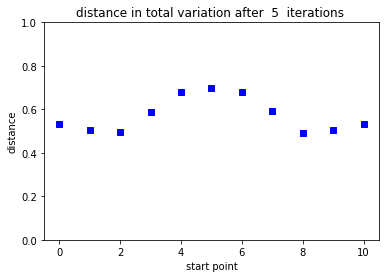

In [9]:
# Let s fix the Niter value 
Niter=5

# Here we save the distance values 
distseqlocalstart=np.ones(L+1)

for i in range(L+1):
    X0=i
    echantillon=MCtestloc(X0,Niter,Nsamples,TwoWellLaw)
    histo=np.histogram(echantillon,L+1,range=(-0.5,L+1-0.5),density=True)
    distseqlocalstart[i]=totvardist(histo[0],TwoWellLaw)

plt.figure(4)
plt.title("distance in total variation after  " + str(Niter) + "  iterations ")
plt.ylabel("distance")
plt.xlabel("start point")
plt.ylim(0,1)
plt.plot(distseqlocalstart,'bs')
plt.show()



### Distance according to the number of iterations


For a fixed starting point, one can numerically study the distance in total variation according to the number of iterations.

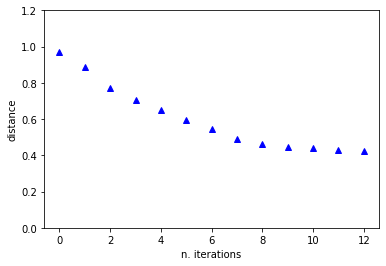

In [10]:
# start point
X0=3

# maximal number of iterations shown in the plot
Niter=12


distseqlocalniter=np.ones(Niter+1)

for i in range(Niter+1):
    echantillon=MCtestloc(X0,i,Nsamples,TwoWellLaw)
    histo=np.histogram(echantillon,L+1,range=(-0.5,L+1-0.5),density=True)
    distseqlocalniter[i]=totvardist(histo[0],TwoWellLaw)

plt.figure(5)
plt.ylim(0,1.2)
plt.plot(distseqlocalniter,'b^')
plt.ylabel("distance")
plt.xlabel("n. iterations")
plt.show()

## Global version

The local version of the Metropolis-Hastings algorithm converges with difficulty because the Markov chain $ (X_n) $ remains blocked in the wells. To avoid this problem, consider a global change proposition $ Q (.,.) $ Choosing a site uniformly among all the possible states $\{0, .., 2l \} $. This is a major change because the proposition no longer depends on the current state $ x $:

$$ \forall x, y \in E, \quad Q (x, y) = \frac {1} {2l +1}. $$

In [11]:
Q=(np.ones((L+1,L+1)))/(L+1)

def globalproposition():
    
    return random.choice(range(L+1))

This gives us as a Metropolis report

$$ \forall x, y \in E, \quad \quad r (x, y) = 2 ^ {| y-l | - | x-l |}. $$

To define the acceptance function, we use the Metropolis rule, i.e.

$$ \lambda (x, y) \equiv 1, \quad F (z) = \min (1, z). $$

hence the acceptance function
$$ a (x, y) = \begin {cases} 2 ^ {| y-l | - | x-l |}, \quad & \mbox {si $ x \neq y $, $ | y-l | <| x-l | $} \\ 1 \quad & \mbox {si $ x \neq y $, $ | y-l | \geq | x-l | $} \end {cases} $$

In [12]:
def metropolisacceptance(x,y,target):
    if x!=y and abs(y-l)<abs(x-l):
        return 2**(abs(y-l)-abs(x-l))
    return 1

Below is an implementation of the global version of the algorithm.

In [13]:
def MHglobal(X0,Niter,target):
    
       Xseq=[X0]  
    
       for n in range(Niter):
        
        Xn=Xseq[-1]
        
        y=globalproposition()
        
        U=np.random.rand(1)[0]
        
        if  U <= metropolisacceptance(Xn,y,target):
            Xseq+=[y]
        
        else:
            Xseq+=[Xn]
    
       return Xseq
         


By launching the algorithm, we observe that the trajectory $ (X_n) $ explores the state space more quickly than before.

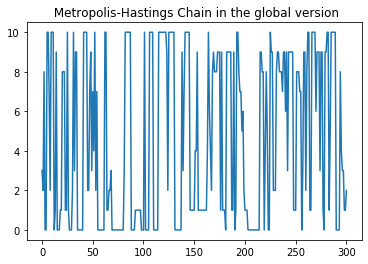

In [14]:
Niter=300

X=MHglobal(X0,Niter,TwoWellLaw)

plt.figure(14)
plt.title(' Metropolis-Hastings Chain in the global version')
plt.plot(X)
plt.show()

## Global version: digital experiences


### Distance according to the starting point


The same tests are carried out as previously. We start with the histograms.

<Figure size 432x288 with 0 Axes>

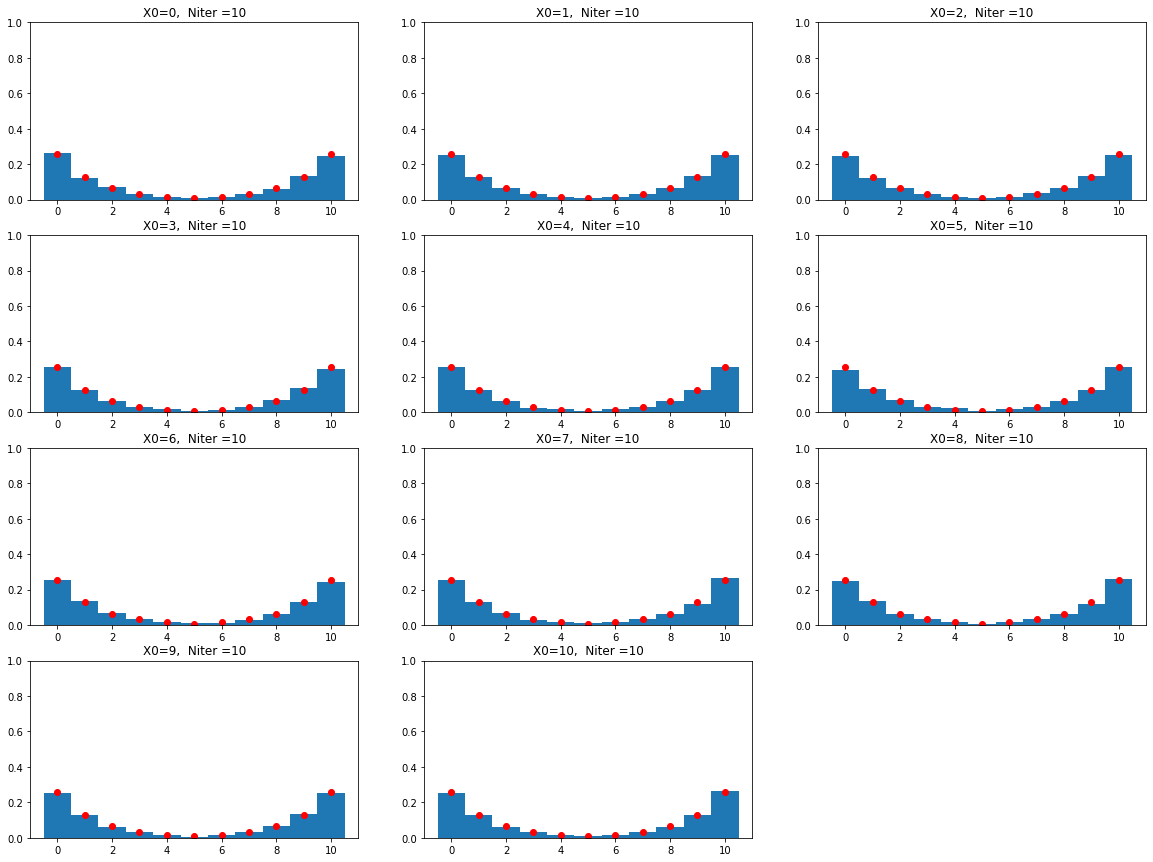

In [15]:

Niter=10

# Définition de la fonction utilisée dans la méthode Monte Carlo pour la version globale
def MCtestglob(X0,Niter,Nsamples,target):
    
    """
    the function used in the Monte Carlo method for the global version
    """
    echantillon=[]
    
    for k in range(Nsamples):
        
        echantillon += [MHglobal(X0,Niter,target)[-1]]
        
        MHglobal(X0,Niter,target)
        
    return echantillon


Nsamples=5000 # size of the used sample to construct the histogram



plt.figure(7)
plt.figure(figsize=(20,15))

spacing=(L+1)//11
listofinitialpoints= spacing* list(range(12))
listofinitialpoints= [i for i in listofinitialpoints if i <=L]


for i in listofinitialpoints:
        X0= i
        echantillon=MCtestglob(X0,Niter,Nsamples,TwoWellLaw)
        plt.subplot(4,3, listofinitialpoints.index(i)+1)
        plt.hist(echantillon,L+1,range=(-0.5,L+0.5),density=True)
        plt.title("X0=" + str(i)+",  " "Niter ="+ str(Niter))
        plt.plot(TwoWellLaw,'ro')
        plt.axis([-1, L+1, 0, 1])

plt.show()



We observe that:

- The histograms are almost independent of the starting point;
- The histograms seem to describe the target law very well.



Let us now compare the distance in total variation compared to the starting points for the two choices of $ Q $, that is to say local version versus global version.

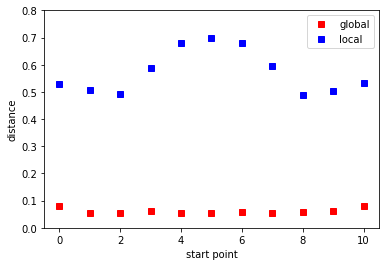

In [16]:
#Parameters
Niter=5
Nsamples=20000

distseqglobstart=np.ones(L+1)

for i in range(L+1):
    X0=i
    echantillon=MCtestglob(X0,Niter,Nsamples,TwoWellLaw)
    histo=np.histogram(echantillon,L+1,range=(-0.5,L+0.5),density=True)
    distseqglobstart[i]=totvardist(histo[0],TwoWellLaw)

plt.figure(8)
plt.ylim(0,0.8)
glob, =plt.plot(distseqglobstart,'rs',label='global') 
loc, =plt.plot(distseqlocalstart,'bs',label='local')
plt.legend(handles=[glob, loc])
plt.ylabel("distance")
plt.xlabel("start point")
plt.show()



### Distance according to the number of iterations



Similarly, if we look at the dependence in time for a fixed starting point we find:

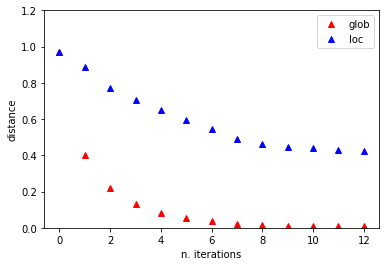

In [17]:
# Parametres
X0=3
Nsamples=20000
Niter=12



distseqglobniter=np.ones(Niter+1)

for i in range(Niter+1):
    echantillon=MCtestglob(X0,i,Nsamples,TwoWellLaw)
    histo=np.histogram(echantillon,L+1,range=(-0.5,L+0.5),density=True)
    distseqglobniter[i]=totvardist(histo[0],TwoWellLaw)

plt.figure(9)
plt.ylim(0,1.2)

glob, =plt.plot(distseqglobniter,'r^',label='glob') 
loc, =plt.plot(distseqlocalniter,'b^',label='loc')
plt.legend(handles=[glob, loc])
plt.ylabel("distance")
plt.xlabel("n. iterations")
plt.show()